<font size=6>B13 setup - PLE scan</font>

In [1]:
import sys
sys.path.append("..")
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

from LowLevelModules.NIdaqAPD import *

from LowLevelModules.GeneralFunctions import *
from LowLevelModules.bristol_wavelength_meter_client import *
from LowLevelModules.EFW_filter import *
from LowLevelModules.NIdaq import *
from LowLevelModules.Instruments import DG645
from LowLevelModules.NIdaqAPD import APDCounter

from collections import deque

import visa
from pyvisa import util

import nidaqmx
import numpy as np
import time

from skimage import data
from skimage.feature import match_template
from scipy.optimize import curve_fit
# http://scipy.github.io/old-wiki/pages/Cookbook/FittingData
from scipy import optimize

from pymeasure.instruments.thorlabs import ThorlabsPM100USB

import ipywidgets as widgets
from IPython.display import display
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

In [2]:
%matplotlib inline

from LowLevelModules.NIdaq import *
from LowLevelModules.NIdaqAPD import *
from LowLevelModules.GeneralFunctions import *
from LowLevelModules.Confocal import *

import ipywidgets as widgets
from IPython.display import display
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

from scipy.misc import electrocardiogram
from scipy.signal import chirp, find_peaks, peak_widths

In [3]:
from LowLevelModules.Spectroscopy import Spectrum
from LowLevelModules.GeneralFunctions import LivePlot2D, prettify_2d_plot
from LowLevelModules.LightField import LightField

In [4]:
import PrincetonInstruments.LightField.AddIns as AddIns
from PrincetonInstruments.LightField.Automation import Automation
from PrincetonInstruments.LightField.AddIns import CameraSettings
from PrincetonInstruments.LightField.AddIns import DeviceType
from PrincetonInstruments.LightField.AddIns import ExperimentSettings

In [5]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl


# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 6))
mpl.rc('image', cmap='gray')

In [6]:
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims
import trackpy as tp

In [7]:
DG645_address = 'GPIB0::15::INSTR'

bristolCOM = 7

scan_terminal = '/Dev2/ao1' # laser scan

DG_trig_terminal = '/Dev2/port1/line3'

shutter_ctrl_terminal ='/Dev1/port0/line1'

APD_terminal = '/Dev1/PFI3'
APD_ctr = '/Dev1/ctr2' # APD counter

In [8]:
# initialize the FSM object
FSM1 = FSM(setup='B13_50x')

In [10]:
FSM1.read_position('micron')

(-0.39716318703431464, -0.17093509945602514)

In [ ]:
%matplotlib notebook

ts = time.time()
xcen,ycen = FSM1.read_position('microns')
a,b,c=FSM1.scan_2D(-1.02,3.74,10,10,60,60,scan_rate=200)
ttot = time.time()-ts
print(f'Total scan time (s) = {ttot:.3f}')

In [59]:
import importlib
import LowLevelModules
importlib.reload(LowLevelModules.Confocal)
from LowLevelModules.Confocal import *

In [10]:
import importlib
import LowLevelModules
importlib.reload(LowLevelModules.GeneralFunctions)
from LowLevelModules.GeneralFunctions import *

In [11]:
from LowLevelModules.GeneralFunctions import *

<IPython.core.display.Javascript object>


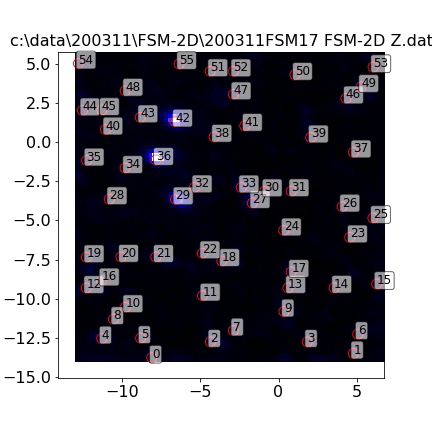

In [50]:
# load image and track particles
f=load_and_track(r'c:\data\200311\FSM-2D','200311FSM17 FSM-2D','.dat',minmass=40);

In [51]:
f

,y,x,mass,size,ecc,signal,raw_mass,ep
0,-13.749327,-8.079591,62.043137,0.863802,0.350515,15.749412,63.4,NaN
1,-13.481563,4.765125,47.725490,0.860233,0.432432,12.408627,48.9,NaN
2,-12.739638,-4.339885,72.542745,0.866025,0.421053,18.135686,73.1,NaN
3,-12.743406,1.829781,47.725490,0.871780,0.342105,11.454118,48.5,NaN
4,-12.525906,-11.277242,65.861176,0.872278,0.438095,15.749412,67.0,NaN
5,-12.502599,-8.791589,51.066275,0.875417,0.353659,11.931373,52.6,NaN
6,-12.247188,5.046563,57.270588,0.856349,0.500000,15.272157,57.8,NaN
7,-12.015684,-2.880454,50.589020,0.884884,0.265060,10.976863,51.9,NaN
8,-11.290446,-10.527203,58.225098,0.863656,0.263736,14.794902,59.4,NaN
9,-10.804468,0.345093,51.066275,0.864675,0.387500,12.885882,52.6,NaN


# Load Spectrometer

In [9]:
# # Initialize LightField --> make sure LF is closed before starting this initialization
# ts = time.time()
# LFauto = LightField()
# ttot = time.time()-ts
# print(f'Total scan time (s) = {ttot:.3f}')

Lightfield startup and setup OK
Total scan time (s) = 39.872


In [52]:
# # setup spectrometer
# wdir = r'Z:\Projects\Diamond NV centers\NV spectrometer\20200311'
# base_name = 'SiV_533A_V1'
# acq_time = 10
# save_data = True

# #deal with LightField settings
# LFauto.set_acquisition_time(acq_time)
# LFauto.set_path(wdir)
# LFauto.set_filename(base_name)
# LFauto.set_filename_increment()

# Fine tune spectrometer settings

In [ ]:
# LFauto.set_value(CameraSettings.ShutterTimingMode,"Normal")
# LFauto.set_acquisition_time(0.4)

# LFauto.set_value(ExperimentSettings.FileNameGenerationIncrementNumber,61)

In [ ]:
# # take data continuously
# LFauto.set_filename_increment(True)
# LFauto.set_acquisition_time(5)
# LFauto.set_value(CameraSettings.ShutterTimingMode,"AlwaysOpen")
# while True:
#     try:
#         LFauto.acquire()
#     except:
# #         LFauto.set_value(CameraSettings.ShutterTimingMode,"Normal")
#         break

# Go to positions successively and take spectrum

<IPython.core.display.Javascript object>


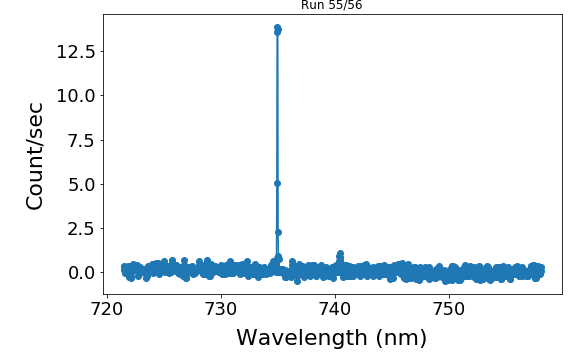

current x,y -8.079591346153848,-13.749326923076923
Lightfield: running Acquire()
Lightfield: Acquire() finished
loading
current run 0
[736.50510024 736.94397383]
current x,y 4.765124999999998,-13.4815625
Lightfield: running Acquire()
Lightfield: Acquire() finished
loading
current run 1
[736.45022736 736.91654993]
current x,y -4.339884868421052,-12.739638157894737
Lightfield: running Acquire()
Lightfield: Acquire() finished
loading
current run 2
[736.50510024 737.02624095 737.73893519 751.58422992]
current x,y 1.82978125,-12.74340625
Lightfield: running Acquire()
Lightfield: Acquire() finished
loading
current run 3
[736.53253553 736.94397383]
current x,y -11.277241847826087,-12.52590579710145
Lightfield: running Acquire()
Lightfield: Acquire() finished
loading
current run 4
[736.45022736 736.91654993 741.10347722]
current x,y -8.791588785046729,-12.502599299065421
Lightfield: running Acquire()
Lightfield: Acquire() finished
loading
current run 5
[736.47766418 736.94397383]
current x,y 5

Lightfield: Acquire() finished
loading
current run 47
[734.55526207 736.50510024 736.83427368 737.90332973]
current x,y -9.7758125,3.2689062500000006
Lightfield: running Acquire()
Lightfield: Acquire() finished
loading
current run 48
[736.45022736 736.94397383]
current x,y 5.2638125,3.508375000000001
Lightfield: running Acquire()
Lightfield: Acquire() finished
loading
current run 49
[736.53253553 736.91654993]
current x,y 1.0457352941176445,4.283272058823531
Lightfield: running Acquire()
Lightfield: Acquire() finished
loading
current run 50
[736.50510024 736.94397383]
current x,y -4.356829896907216,4.510534793814433
Lightfield: running Acquire()
Lightfield: Acquire() finished
loading
current run 51
[736.58740385 736.91654993 737.08108189]
current x,y -2.880751329787234,4.505119680851063
Lightfield: running Acquire()
Lightfield: Acquire() finished
loading
current run 52
[736.45022736 736.91654993]
current x,y 6.029705882352939,4.771213235294116
Lightfield: running Acquire()
Lightfield: 

In [54]:
%matplotlib notebook
lp = LivePlot(subpl=1,x_ext=8, y_ext=5, mk='o', xlabel='Wavelength (nm)', ylabel='Count/sec')
LFauto.set_acquisition_time(15)
LFauto.set_filename_increment()

wdir = r'Z:\Projects\Diamond NV centers\NV spectrometer\20200311'
LFauto.set_path(wdir)


alist =  np.empty(1)
now = datetime.datetime.now()

time_str = now.strftime("%y%m%d %H%M%S")[-6:]


fnamebase = "SiV_533A"+" " +time_str
for i in np.array(list(range(f.shape[0]))):
    try:
        thisx,thisy = (f.iloc[i].x,f.iloc[i].y)
        FSM1.go_to_position(thisx,thisy)
        print(f'current x,y {thisx:.2f},{thisy:.2f}')
        fname = fnamebase +" " + str(i).zfill(2)
        LFauto.set_filename(fname)
        LFauto.acquire()
        data_ref = LFauto.load_acquired_data(wdir, fname)
        print("loading")
        lp.plot_live(data_ref.x,data_ref.y,title1 = f'Run {i}/{f.shape[0]}')

        peaks,properties=find_peaks(data_ref.y, prominence=1.2,distance=5)
        results_half = peak_widths(data_ref.y, peaks, rel_height=0.5)
        alist= np.append(alist,data_ref.x[peaks])

        print(f'current run {i}')
        print(data_ref.x[peaks])
    except:
        break

In [147]:
data_ref.x

array([721.46596468, 721.49376341, 721.52156148, ..., 757.99809841,
       758.02490652, 758.05171379])

In [148]:
lp.plot_live(data_ref.x,data_ref.y,title1 = f'Run {i}/{f.shape[0]}')

# Center NV focus

In [9]:
obj_stage=XPS_stage()

<IPython.core.display.Javascript object>


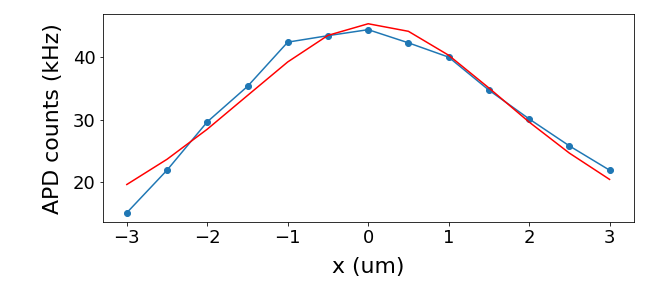

Optimized from fit
Amplitude is 45.3940179118768
Center is 0.05473234028385799
FWHM is 12.574491 um
Background is 1.7154028986863215e-16
Position before scan:  -4.516805
Position after scan:  -4.51676


In [153]:
%matplotlib notebook
obj_stage.center_NV_depth(scan_extent=3,step_size=0.5)

In [24]:
obj_stage.stage_for_scan.read_position()

-4.518045

In [10]:
obj_stage

# Measure total FL
measure PSB

In [ ]:

FSM1.go_to_position(3,4)
terminal1 = '/Dev1/PFI1'
# terminal2 = '/Dev1/PFI5'

# run this when you start g2 measurement
APD1 = APDCounter(terminal1, ctr=1, task_name="APD1")
# APD2 = APDCounter(terminal2, ctr=2, task_name="APD2")
# # start task and count
# t_start = time.time()
# t_collect = 6

APD1.start()
# APD2.start()
# print("Started at " + time.strftime("%a %b %d %H:%M:%S %Y"))
cts1 = APD1.read() / 1000
# cts2 = APD2.read() / 1000
APD1.close()
# APD2.close()


FSM1.go_to_position(0,0)

terminal1 = '/Dev1/PFI1'
# terminal2 = '/Dev1/PFI5'

# run this when you start g2 measurement
APD1 = APDCounter(terminal1, ctr=1, task_name="APD1")
# APD2 = APDCounter(terminal2, ctr=2, task_name="APD2")
# # start task and count
# t_start = time.time()
# t_collect = 6

APD1.start()
# APD2.start()
# print("Started at " + time.strftime("%a %b %d %H:%M:%S %Y"))
cts1 = APD1.read() / 1000
# cts2 = APD2.read() / 1000
APD1.close()
# APD2.close()

# Track SiV 

In [46]:
help(FSM1.scan_2D)

Help on method scan_2D in module LowLevelModules.Confocal:

scan_2D(center_x=0, center_y=0, x_size=20, y_size=20, mesh_x=20, mesh_y=20, scan_rate=200, save_data=True, live_plot=True) method of LowLevelModules.Confocal.FSM instance
    Line by line live plot
    allow x and y to be of different number of points and different length
    curr_x,curr_y - um
    x_size, y_size - um
    mesh_x, mesh_y - number of points
    
    Parameters: 
    Returns:
    xx
    yy
    FSM2D (array): Scan image in kHz
    Data format
    FSM[row,col] corresponds to coordinate (X=xx[col],Y=yy[row])



<IPython.core.display.Javascript object>


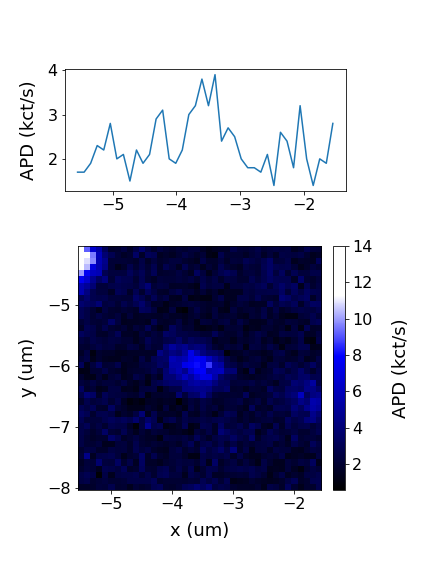

<IPython.core.display.Javascript object>


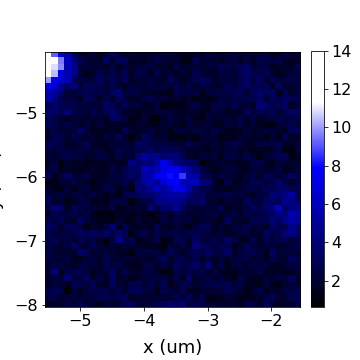

C:\data\200312\FSM-2D\FSM-2D_010721 Z.txt
Total scan time (s) = 21.785


In [40]:
# take a small scan
%matplotlib notebook

ts = time.time()
xcen,ycen = FSM1.read_position('microns')
a,b,c=FSM1.scan_2D(-3.55,-6.03,4,4,40,40,scan_rate=100)
ttot = time.time()-ts
print(f'Total scan time (s) = {ttot:.3f}')

In [41]:
templateC= c

In [ ]:
FSM1.go_to_position(-2,4.5)

In [ ]:
FSM1.track_NV_2D(templateC,4,4)

In [50]:
help(FSM1.track_NV_2D)

Help on method track_NV_2D in module LowLevelModules.Confocal:

track_NV_2D(template, size_x, size_y, scan_rate=200) method of LowLevelModules.Confocal.FSM instance
    Track NV given a template (with the NV at its geometric center)
    2D scan keeping objective fixed
    
    Parameters: 
    template (array): NV template with an NV at its geometric center
    size_x,size_y (float): length of the image in um
    
    Returns: 
    (x,y) (float,float): final NV location in um



# Center SiV

In [ ]:
FSM1.go_to_position(-0.61,-2.44)
FSM1.center_NV_2D()

# Toptica

In [10]:
def shutter_ctrl_write(v):
    """write a digital signal to shutter
    maximum frequency of operation - 10 Hz (continuous)
    40 Hz - burst - 4 sec maximum with 1 minute minimum between burst
    """
    with nidaqmx.Task() as do_task:
        do_task.do_channels.add_do_chan(shutter_ctrl_terminal)
        do_task.write(v)      

def DG_trig_write_pulse():
    """generate a digital pulse of width around 1-3 ms depends on latency"""
    with nidaqmx.Task() as do_task:
        do_task.do_channels.add_do_chan(DG_trig_terminal)
        do_task.write(True)
        do_task.write(False)
        
def DG_trig_write(b):
    """write a single bit (True/False) """
    with nidaqmx.Task() as do_task:
        do_task.do_channels.add_do_chan(DG_trig_terminal)
        do_task.write(b)

In [10]:
# https://stackoverflow.com/questions/19547084/can-i-explicitly-close-a-ctypes-cdll
# windll.kernel32.FreeLibrary(bristol521handle)
# does not seem to actually close the handle

In [9]:
# shutter_ctrl_write(True)

# EFW filter wheel

In [11]:
efw_instance = EFW() # run once only

In [12]:
# switch filter to 750 LP
efw_instance.change_filter('750LP')
while True:
    if efw_instance.read_position() == efw_instance.EFW_wheel_filter['750LP']:
        break
    else:
        efw_instance.change_filter('750LP')

In [14]:
efw_instance.read_position()

4

In [15]:
efw_instance.EFW_wheel_filter['750LP']

4

# Bristol wavemeter

In [12]:
bristol = Bristol()

In [35]:
currentLambda,currentPower = bristol.readBristol()
print(f'Wavelength (nm-air) = {currentLambda: .4f}')
print(f'Bristol power (mW) = {currentPower: .3f}')

Wavelength (nm-air) =  0.0000
Bristol power (mW) =  0.000


<font size="10">Monitor wavelength</font>

In [77]:
np.average(b)

108.47588222249564

<IPython.core.display.Javascript object>


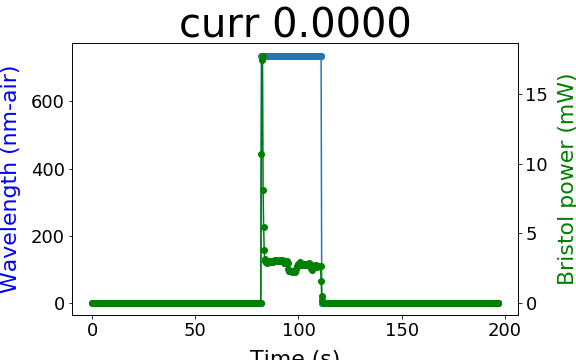

In [76]:
%matplotlib notebook
a,b,c=monitor_wavelength(bristol)

<font size="6">Scan laser piezo voltage</font>

In [79]:
help(scan_laser_piezo)

Help on function scan_laser_piezo in module LowLevelModules.Confocal:

scan_laser_piezo(bristol, PM, vstart=-5, vend=5, scanpts=50, PowerMeterOn=False, save_data=True, lasercurrent=nan, potreading=nan, PDOn=False, LFOn=False, LFauto=None, wdir=None)
    scan laser piezo voltage and monitor wavelength and power
    scan laser frequency in discrete steps
    software timed



<IPython.core.display.Javascript object>


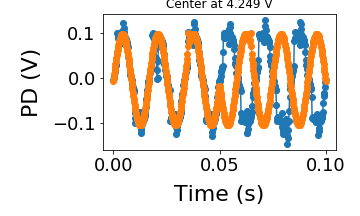

<IPython.core.display.Javascript object>


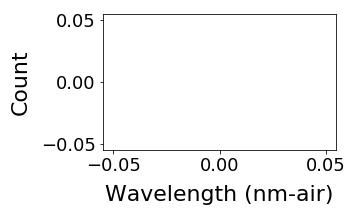

<IPython.core.display.Javascript object>


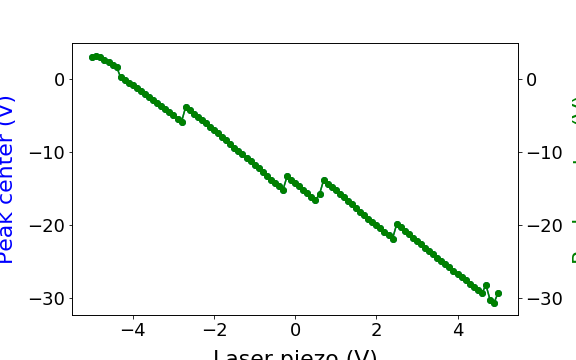

<IPython.core.display.Javascript object>


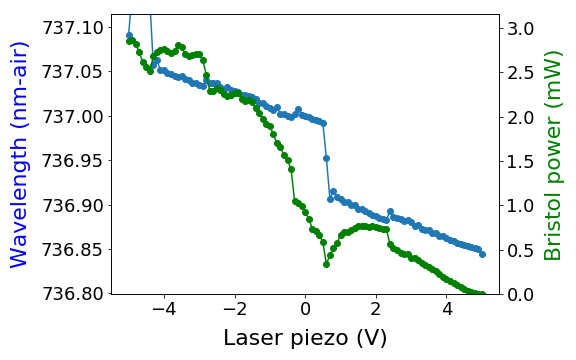

C:\data\200311\TopticaScan\TopticaScan_202817.txt


In [85]:
%matplotlib notebook
scan_laser_piezo(bristol,1,-5,5,101,False,True,56,65)

# Fit wavelength to a piecewise linear function

In [ ]:
%matplotlib notebook
directory = r'C:\data\200207\TopticaScan'
fileprefix = 'TopticaScan_124017'

fit_wavelength_segments(directory,fileprefix)

In [19]:
def pulse_wfm(t,tstart,width):
    return np.heaviside(t-tstart,0)-np.heaviside(t-tstart-width,0)

<font size=6>set DAQ counter clock output</font>

In [13]:
# setup DG645 - 637, 737, RF switch
# in us
# Note - there is about 85 ns delay from external trigger to T0 rising edge

# setup such that we use both 532 and 637 laser as excitation

time_per_point = 1 # sec 
init_time = 1e-6 # 532 nm and 637 nm, sec
PLE_time = 5e-6 # 737 nm, sec
delay637 = 0.048e-6 # sec
delay737 = 0.860e-6 # sec
delay532 = 0.620e-6 # sec

# maximum of the delay time
delay_init = max(delay637,delay532)
delay_resonance = delay737

marginFront = 0.100e-6 # allow the excitation laser to truely turn off, let the defect decays to its ground state
marginBack = 0.050e-6 # some margin at the back to avoid the initialization laser turning on in the PLE time

# AB - 532, CD - 737, EF - 637 digital modulation, GH - RF switch
# See DG645 manual p56 delay and output commmands
BNC_532 = 1 # AB
ch1_532 = 2 # A
ch2_532 = 3 # B

BNC_737 = 2 # CD
ch1_737 = 4 # C
ch2_737 = 5 # D

BNC_637 = 3 # EF
ch1_637 = 6 # E
ch2_637 = 7 # F

BNC_switch = 4 # GH
ch1_switch = 8 # G
ch2_switch = 9 # H

BNC_init = BNC_637
ch1_init = ch1_637
ch2_init = ch2_637

BNC_resonance = BNC_737
ch1_resonance = ch1_737
ch2_resonance = ch2_737

# nominal dark time for the init laser
darkTime = marginFront + PLE_time + marginBack # excitation laser off

TTL_delay_resonance = max(0, delay_init + marginFront - delay_resonance )
TTL_delay_init = max(0, delay_resonance - delay_init - marginFront)

# TTL_delay_532 = max(0, delay_resonance - delay532 - marginFront)
# TTL_delay_637 = max(0, delay_resonance - delay637 - marginFront)

TTL_delay_532 = TTL_delay_init
TTL_delay_637 = TTL_delay_init + delay_init - delay637

initMargin = 0.100e-6

cycleEndInitTime = max(initMargin, init_time - TTL_delay_init - delay_init)
cycle_time = TTL_delay_init + delay_init + darkTime + cycleEndInitTime

num_cycle = int(np.floor(time_per_point/cycle_time)) # must be integer

In [14]:
dg_source = DG645(DG645_address)
a=dg_source.read_error()
print(a)
dg_source.close()

0


In [19]:
a

'0'

In [14]:
def DG645_init():
    """
    set DG645 to burst mode and setup the correct delay values
    """
    dg_source = DG645(DG645_address)

    # set output polarity
    dg_source.set_polarity(BNC_532,0) # negative polarity, default HIGH
    dg_source.set_polarity(BNC_637,0)
    dg_source.set_polarity(BNC_737,1) # positive polarity, default LOW
    dg_source.set_polarity(BNC_switch,1)

    # repump/initialization
    dg_source.set_delay(ch1_532,0,TTL_delay_532)
    dg_source.set_delay(ch2_532,ch1_532,darkTime)

    dg_source.set_delay(ch1_637,0,TTL_delay_637)
    dg_source.set_delay(ch2_637,ch1_637,darkTime)

    # resonance excitaiton
    dg_source.set_delay(ch1_resonance,0,TTL_delay_resonance)
    dg_source.set_delay(ch2_resonance,ch1_resonance,PLE_time)

    # collection
    dg_source.set_delay(ch1_switch,0,TTL_delay_resonance+delay_resonance)
    dg_source.set_delay(ch2_switch,ch1_switch,PLE_time)

    dg_source.set_trigger_source(1) # external rising edge
    dg_source.set_burst_mode(1)
    dg_source.set_burst_period(cycle_time)
    dg_source.set_burst_delay(0)
    dg_source.set_burst_count(num_cycle)
    dg_source.close()
    
def DG645_default():

    dg_source = DG645(DG645_address)

    # set output polarity
    dg_source.set_polarity(BNC_532,0) # negative polarity, default HIGH
    dg_source.set_polarity(BNC_637,0)
    dg_source.set_polarity(BNC_737,0) 
    dg_source.set_polarity(BNC_switch,1) # positive polarity, default LOW
    
    dg_source.close()
        
def DG645_737_polarity(p):
    """
    turn on or off 737 laser (default state)
    0 -> negative polarity, default ON
    1 -> positive polarity, default OFF
    """
    dg_source = DG645(DG645_address)
    dg_source.set_polarity(BNC_737,p)    
    dg_source.close()
    
def DG645_set_polarity(chan,p):
    """
    turn on or off chan (channel, BNC_532, BNC_637 or BNC_737)
    0 -> negative polarity, default ON
    1 -> positive polarity, default OFF
    """
    dg_source = DG645(DG645_address)
    dg_source.set_polarity(chan,p)    
    dg_source.close()

In [15]:
DG645_default()

In [17]:
DG645_init()

In [19]:
print(num_cycle)
print(cycle_time)
print(num_cycle*cycle_time)

162601
6.150000000000001e-06
0.9999961500000002


In [23]:
# dg_source = DG645(DG645_address)
# print(dg_source.set_burst_count(10))
# dg_source.close()

In [20]:
dg_source = DG645(DG645_address)
print(dg_source.get_burst_count())
dg_source.close()

162601



In [25]:
DG645_737_polarity(True)

In [26]:
DG645_init()

In [30]:
DG645_default()

In [16]:
# simulate sequence
# plot 2 cycles
plot_pts = 1000
tplot = np.linspace(0,cycle_time,plot_pts)
plt_TTL_532 = 1-pulse_wfm(tplot,TTL_delay_532,darkTime)
plt_laser_532 = 1-pulse_wfm(tplot,TTL_delay_532+delay532,darkTime)

plt_TTL_637 = 1-pulse_wfm(tplot,TTL_delay_637,darkTime)
plt_laser_637 = 1-pulse_wfm(tplot,TTL_delay_637+delay637,darkTime)

plt_TTL_resonance = pulse_wfm(tplot,TTL_delay_resonance,PLE_time)
plt_laser_resonance = pulse_wfm(tplot,TTL_delay_resonance+delay_resonance,PLE_time)

plt_rf = pulse_wfm(tplot,TTL_delay_resonance+delay_resonance,PLE_time)

# plt.plot(tplot,plt_TTL_532)
# plt.plot(tplot,plt_laser_532)
# plt.plot(tplot,plt_TTL_637)
# plt.plot(tplot,plt_laser_637)
# plt.plot(tplot,plt_TTL_resonance)
# plt.plot(tplot,plt_laser_resonance)

# plt.plot(tplot,plt_rf)

In [19]:
# import seaborn as sns

# segments = 7
# points_per_segment = 1000

# #your data preparation will vary
# x = np.tile(np.linspace(0,cycle_time,plot_pts), segments)
# z = np.floor(np.arange(points_per_segment * segments)/points_per_segment)
# y = np.sin(x * (1 + z))

# a =plt_TTL_532
# b =plt_laser_532
# c =plt_TTL_637
# d =plt_laser_637
# e =plt_TTL_resonance
# f =plt_laser_resonance
# g =plt_rf


# y=np.concatenate((a,b,c,d,e,f,g), axis=None)

# df = pd.DataFrame({'x': x, 'y': y, 'z': z})

# pal = sns.color_palette()
# g = sns.FacetGrid(df, row="z", hue="z", aspect=15, height=.5, palette=pal)
# g.map(plt.plot, 'x', 'y')
# g.map(plt.axhline, y=0, lw=1, clip_on=False)
# # Set the subplots to overlap
# g.fig.subplots_adjust(hspace=-.00)
# g.set_titles("")
# g.set(yticks=[])
# g.despine(bottom=True, left=True)

# plt.show()

Text(3.075e-06,-5.5,'RF switch TTL')

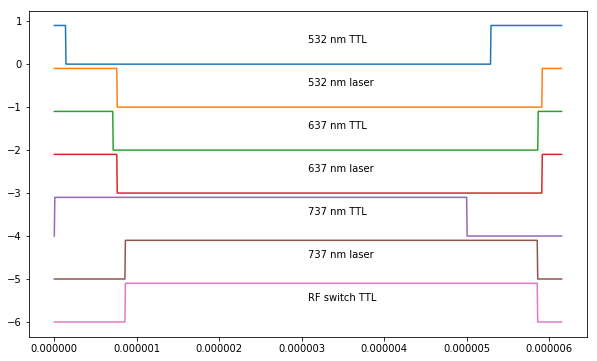

In [17]:
t0=np.linspace(0,cycle_time,plot_pts)
a =plt_TTL_532
b =plt_laser_532
c =plt_TTL_637
d =plt_laser_637
e =plt_TTL_resonance
f =plt_laser_resonance
g =plt_rf

fig2 = plt.figure()

ax2 = fig2.add_subplot(111)
ax2.plot(t0,0.9*a)
ax2.plot(t0,0.9*b-1)
ax2.plot(t0,0.9*c-2)
ax2.plot(t0,0.9*d-3)
ax2.plot(t0,0.9*e-4)
ax2.plot(t0,0.9*f-5)
ax2.plot(t0,0.9*g-6)
ax2.annotate("532 nm TTL",(cycle_time/2,0.5))
ax2.annotate("532 nm laser",(cycle_time/2,-0.5))
ax2.annotate("637 nm TTL",(cycle_time/2,-1.5))
ax2.annotate("637 nm laser",(cycle_time/2,-2.5))
ax2.annotate("737 nm TTL",(cycle_time/2,-3.5))
ax2.annotate("737 nm laser",(cycle_time/2,-4.5))
ax2.annotate("RF switch TTL",(cycle_time/2,-5.5))

In [ ]:
# how long does it take for the toptica laser to stabilize in wavelength and power once I step the piezo voltage control?

<font size=6>Incremental save</font>

In [13]:
emptyA = np.empty([0])

In [6]:
fname=data_save(emptyA, figure=None, data_type="IncrementalSave", header="try")
f= open(fname,"a")

C:\data\191108\IncrementalSave\IncrementalSave_190517.txt


In [10]:
fname

'C:\\data\\191108\\IncrementalSave\\IncrementalSave_191004'

In [14]:
fname=data_save(emptyA, figure=None, data_type="IncrementalSave", header="try")
f= open(fname+".txt","a")

while True:
    try:
        print(time.time())
        time.sleep(1)
        f.write(f'{time.time()} {time.time()*2} {time.time()-1231}\n')
    except:
        f.close() 
        break

C:\data\191108\IncrementalSave\IncrementalSave_191201.txt
1573258321.6465108
1573258322.6465683
1573258323.6476254
1573258324.6476827


<font size=6>Scan laser with collection</font>

In [ ]:
# try NV tracking

In [ ]:
# trig_DG645 = DO('/Dev2/port1/line3')
# trig_DG645.write(False)

In [16]:
# # scan laser frequency in discrete steps
# # software timed
# voltage = np.linspace(-1,1,50)
# for v in voltage:
#     # initialize counter
#     task_toptica.write(v, auto_start=True, timeout=5)
#     # output high on a digital channel, which is connected to the DG645 trigger input
#     trig_DG645.write(True)
#     # this set up the pulse sequence
#     # wait till this is done
    
#     # read counts
    
#     # read fabry perot - need to start the read and write channel at the same time
    
#     # read wavemeter
#     currentLambda = CLGetLambdaReading(bristol521handle)
#     currentPower = CLGetPowerReading(bristol521handle)
    
#     # re-center NV every few cycles
    
#     # update liveplot
    
#     # incremental save data to file
    


In [36]:
PLE_APD = CI(APD_terminal,APD_ctr)
PLE_APD.start()
time.sleep(1)
print(PLE_APD.read_counts())
PLE_APD.close()

0.0


In [27]:
# time.time() good to millisecond resolution
time_start = time.time()
time.sleep(0.129565)
time_end = time.time()
print(time_end-time_start)

0.13000726699829102


<font size=4>check communication time and latency</font>

# Actual PLE 

In [41]:
# shutter_ctrl_write(True)

In [76]:
# shutter_ctrl_write(False)

In [40]:
# efw_instance.change_filter('750LP')
# efw_instance.read_position()

4

In [52]:
efw_instance.read_position()

0

In [26]:
shutter_ctrl_write(False)
efw_instance.change_filter('750SP')
efw_instance.read_position()

0

In [27]:
shutter_ctrl_write(False)
efw_instance.change_filter('open')
efw_instance.read_position()

2

In [35]:
# efw_instance.change_filter('open')
# efw_instance.read_position()

2

In [108]:
read_Toptica_power()

6540.935092388428

In [19]:
time.sleep(0.1) # wait for a short time 
shutter_ctrl_write(False)
time.sleep(0.1) # wait for a short time
# switch filter to 750 LP
efw_instance.change_filter('750LP')
while True:
    if efw_instance.read_position() == efw_instance.EFW_wheel_filter['750LP']:
        break
    else:
        efw_instance.change_filter('750LP')
time.sleep(0.1) # wait for a short time
shutter_ctrl_write(True)
time.sleep(0.1) # wait for a short time 

In [25]:
efw_instance.EFW_wheel_filter['750LP']

4

In [273]:
DG645_default()

In [186]:
toptica_bounded_write(0.5)

In [121]:
currentLambda,currentPower = bristol.readBristol()
print(f'Wavelength (nm-air) = {currentLambda: .4f}')
print(f'Bristol power (mW) = {currentPower: .3f}')

Wavelength (nm-air) =  736.9611
Bristol power (mW) =  3.083


In [173]:
DG645_init()

In [29]:
FSM1.go_to_position(-10.76,-4.33)

5

In [38]:
read_Toptica_power()

6151.180292789358

In [190]:
f.close()

In [189]:
f

<_io.TextIOWrapper name='C:\\data\\200226\\PLEScan\\PLEScan_194151.txt' mode='a' encoding='cp1252'>

In [65]:
4.6*50

190.0

Initial NV location (-3.55, -6.03)


<IPython.core.display.Javascript object>


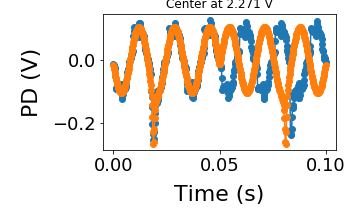

<IPython.core.display.Javascript object>


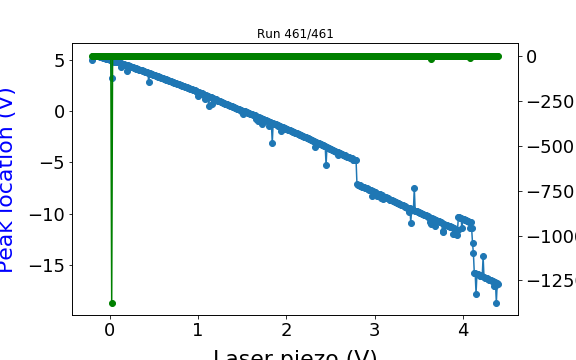

<IPython.core.display.Javascript object>


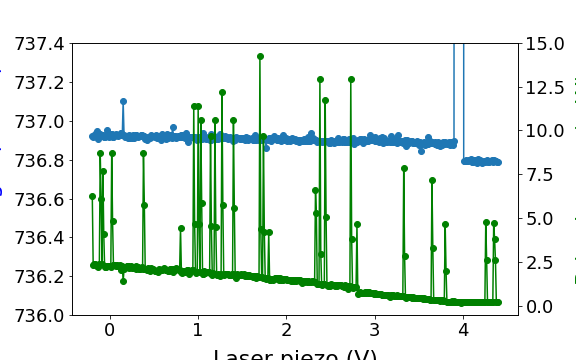

<IPython.core.display.Javascript object>


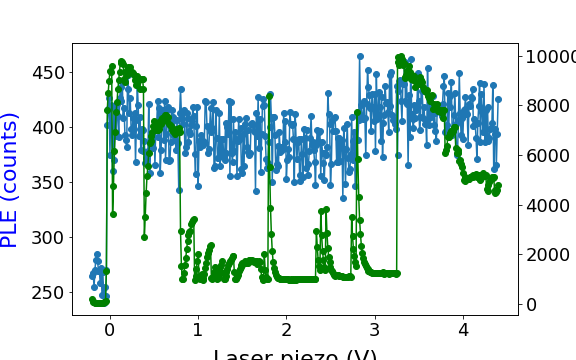

<IPython.core.display.Javascript object>


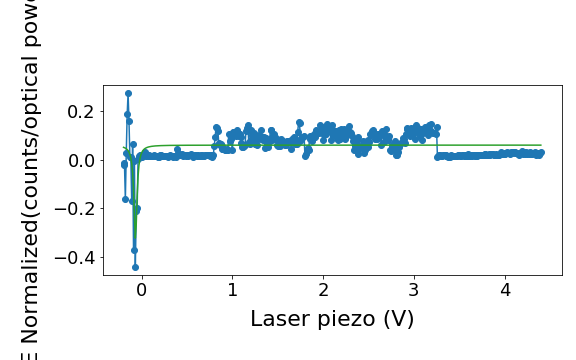

Initialization time (s) = 0.752
C:\data\200312\PLEScan\PLEScan_011122.txt


<IPython.core.display.Javascript object>


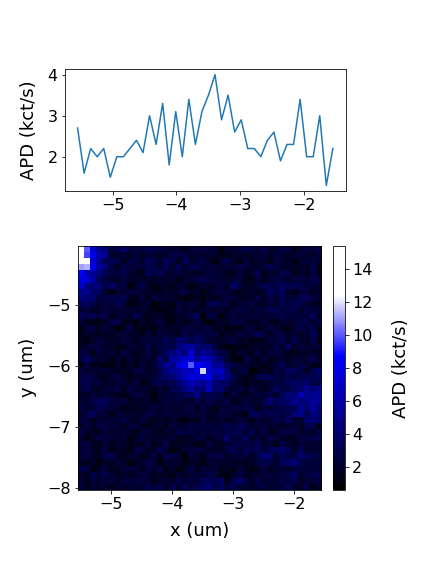

<IPython.core.display.Javascript object>


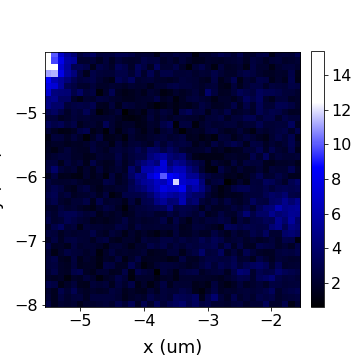

C:\data\200312\FSM-2D\FSM-2D_011442 Z.txt
Current (x,y) (um)= (-3.55, -6.03)


<IPython.core.display.Javascript object>


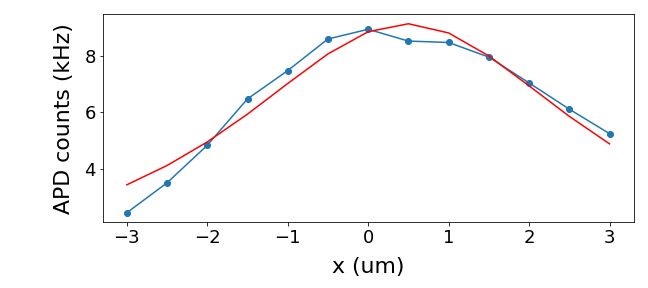

Optimized from fit
Amplitude is 9.143165110369736
Center is 0.48097095906213844
FWHM is 12.688998 um
Background is 2.4593097499455396e-17
Position before scan:  -4.516485
Position after scan:  -4.51599


<IPython.core.display.Javascript object>


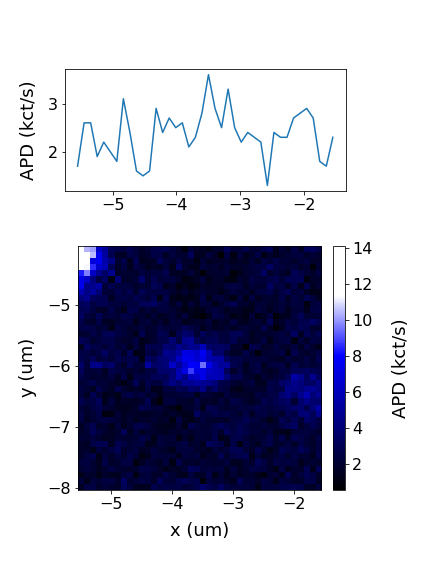

<IPython.core.display.Javascript object>


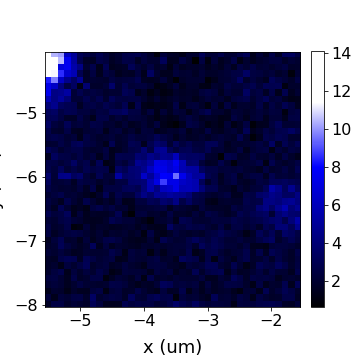

C:\data\200312\FSM-2D\FSM-2D_011842 Z.txt
Current (x,y) (um)= (-3.55, -5.930000000000001)


<IPython.core.display.Javascript object>


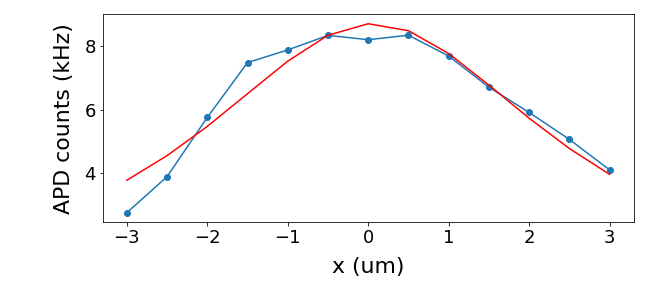

Optimized from fit
Amplitude is 8.69809971652172
Center is 0.06478153880209832
FWHM is 12.661983 um
Background is 5.846262196081625e-13
Position before scan:  -4.516005
Position after scan:  -4.515195


<IPython.core.display.Javascript object>


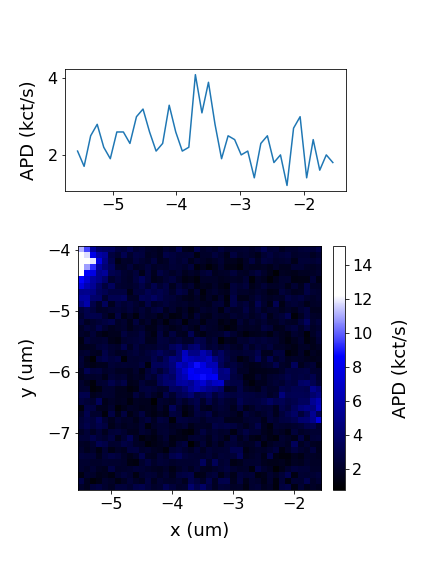

<IPython.core.display.Javascript object>


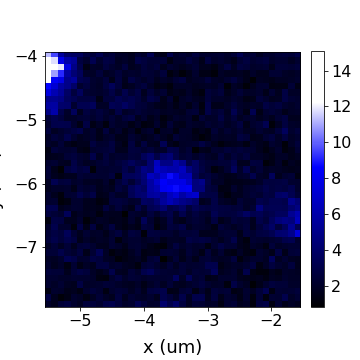

C:\data\200312\FSM-2D\FSM-2D_012220 Z.txt
Current (x,y) (um)= (-3.55, -6.03)


<IPython.core.display.Javascript object>


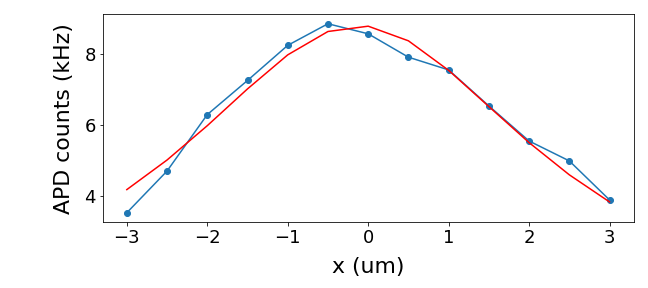

Optimized from fit
Amplitude is 8.810303031799549
Center is -0.11965896558814029
FWHM is 12.881561 um
Background is 1.0580325122059473e-13
Position before scan:  -4.51593
Position after scan:  -4.515175


<IPython.core.display.Javascript object>


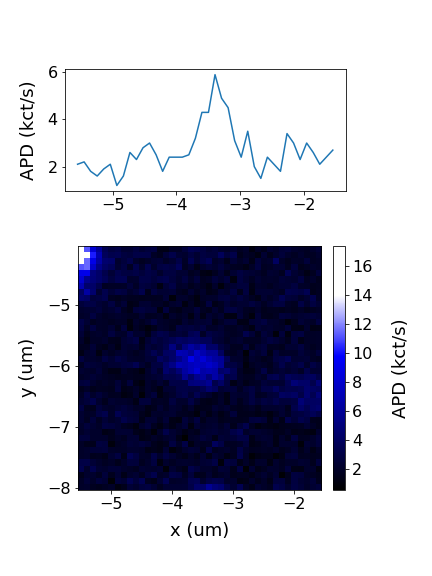

<IPython.core.display.Javascript object>


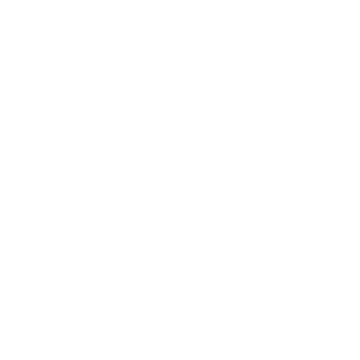

C:\data\200312\FSM-2D\FSM-2D_012550 Z.txt
Current (x,y) (um)= (-3.55, -5.930000000000001)


<IPython.core.display.Javascript object>


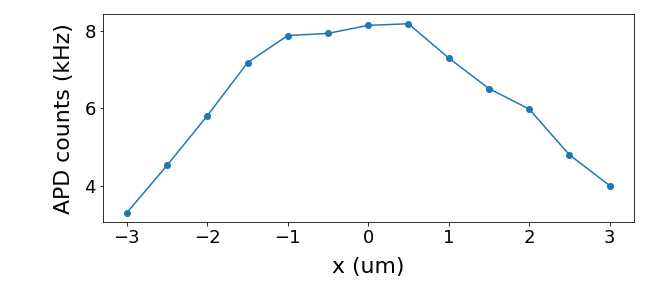

Optimized from fit
Amplitude is 8.432251414339605
Center is -0.007342340572778135
FWHM is 13.375602 um
Background is 5.927840631619082e-15
Position before scan:  -4.51604
Position after scan:  -4.51507
Amplitude, center, FWHM, background -0.385, -0.069, 0.041, 0.060


<IPython.core.display.Javascript object>


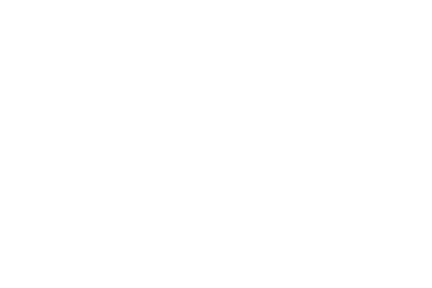

Total run time (s) = 1002.089


In [43]:
# scan laser frequency in discrete steps
# software timed
%matplotlib notebook
time_start = time.time()

time_NV = time_start
NV_x,NV_y = FSM1.return_position('um')
print(f'Initial NV location {NV_x,NV_y}')

NV_drift_x = 0.0 # um/sec
NV_drift_y = 0.0 # um/sec

voltage = np.linspace(-0.2,4.4,461)
FP_FSR_V = 4.783

lpFP = LivePlot(1, 2, 5, 3, 'o', 'Time (s)',"PD (V)")
lpLRFP = LivePlotLR(1, 1, 8, 5, 'o', 'Laser piezo (V)', 'Peak location (V)','Peak amplitude (V)')
lpLR = LivePlotLR(1, 1, 8, 5, 'o', 'Laser piezo (V)', 'Wavelength (nm-air)','Bristol power (mW)')
lpPLE = LivePlotLR(1, 2, 8, 5, 'o', 'Laser piezo (V)',"PLE (counts)","Toptica power (nW)")

lpPLENorm = LivePlot(1, 2, 8, 5, 'o', 'Laser piezo (V)',"PLE Normalized(counts/optical power)")

volt_so_far=[]
powerlist=[]
lambdalist=[]

FPlambda=[]
FPpower=[]

PLElist=[]
PLENormlist = [] # normalized by Toptica power

topticapower=[]

# initialize DG645
DG645_init()
DG_trig_write(False) # initialize trigger to a low state

bkg_count_rate = 330 # Cts/sec
bkg_count = bkg_count_rate*PLE_time/cycle_time*time_per_point 

intialization_time = time.time()-time_start
print(f'Initialization time (s) = {intialization_time:.3f}')

time.sleep(0.1) # wait for a short time 
shutter_ctrl_write(False)
time.sleep(0.1) # wait for a short time
# switch filter to 750 LP
efw_instance.change_filter('750LP')
while True:
    if efw_instance.read_position() == efw_instance.EFW_wheel_filter['750LP']:
        break
    else:
        efw_instance.change_filter('750LP')
time.sleep(0.1) # wait for a short time 
shutter_ctrl_write(True)
time.sleep(0.1) # wait for a short time
        
center_NV = True
center_per_N_run = 100 # center NV every N runs
check_wavelength_per_N_run = 1 # do FP scan every 4 runs

# incremental save

save_data = True
if save_data:
    data_type = 'PLEScan'
    data_header=f"""time_per_point = {time_per_point} # sec 
    init_time = {init_time} # 637 nm, sec
    PLE_time = {PLE_time} # 737 nm, sec
    delay637 = {delay637}
    delay737 = {delay737}
    delay532 = {delay532}
    marginFront = {marginFront} # allow the excitation laser to truely turn off, let the defect decays to its ground state
    marginBack = {marginBack} # some margin at the back to avoid the initialization laser turning on in the PLE time
    current (mA, at 0V) =  58
    pot reading = 70
    piezo control (V) PLE (counts) wavelength(nm-air) power(mW) FP lambda (V) FP power (V) PLENormlist (counts/optical power)
    """    
    data_array = np.array([volt_so_far,PLElist, lambdalist,powerlist,FPlambda,FPpower,topticapower,PLENormlist]).T
    fname = data_save(data_array, None, data_type, data_header)#lpPLE.fig
    f = open(fname+".txt","a")
correct_for_drift = False
# liveplot readings so far
for ind,v in enumerate(voltage):
    try:
        tstart_loop=time.time()
        toptica_bounded_write(v) # task_toptica.write(v, auto_start=True, timeout=5)
        volt_so_far.append(v)
        
        # go to new position
        if correct_for_drift:
            time_diff = time.time()-time_NV
            NV_x += NV_drift_x*time_diff
            NV_y += NV_drift_y*time_diff

            FSM1.go_to_position(NV_x,NV_y)
            time_NV = time.time()
#         print(f'NV position {NV_x,NV_y}')
        
        # initialize counter
        PLE_APD = CI(APD_terminal,APD_ctr)
        PLE_APD.start()

        # output high on a digital channel, which is connected to the DG645 trigger input
        # this set up the pulse sequence
        DG_trig_write_pulse()
        
        # start time
        t_meas_start = time.time()
        
        # measure Bristol wavelength, Fabry-Perot peak, power monitor after beam splitter
        # keep in mind that the 737 nm laser is pulsing with a cycle time of a few us and a duty cycle 70+%
        if  (ind % check_wavelength_per_N_run == 0):
            # read power from photodiode        
            # ... analog channel
            currTopPower = 1
            currTopPower = read_Toptica_power()
            topticapower.append(currTopPower)
#             print(f'toptica power(nW) {currTopPower}')

            # read fabry perot - need to start the read and write channel at the same time
            tstart_FP = time.time()
            t0_this,v_ao_scan_this,aiV_this = FP_scan(v_final=10.0)
            tscan_FP = time.time()-tstart_FP

            ts1 = time.time()
            best_vals = FP_fit(t0_this,v_ao_scan_this, aiV_this)
#             print(best_vals)
            tfit_FP = time.time() - ts1

            if ind==0:
                FPlambda.append(best_vals[1])
                last_value = best_vals[1]
            else:
                curr_value = unwrap_by_pt(best_vals[1],last_value,FP_FSR_V)
                FPlambda.append(curr_value)
                last_value = curr_value #best_vals[1]
            FPpower.append(-best_vals[0])

#             yfit = lorentziansin(v_ao_scan_this, best_vals[0], best_vals[1],best_vals[2],best_vals[3],best_vals[4],best_vals[5],best_vals[6])
            yfit = lorentzianFSR(v_ao_scan_this, best_vals[0], best_vals[1],best_vals[2],best_vals[3],best_vals[4])
            
            lpFP.plot_live(t0_this,aiV_this,yfit)
            lpFP.ax1.set_title(f'Center at {best_vals[1]:.3f} V')
            lpFP.fig.canvas.draw()
#             plt.tight_layout()            

            ttot_FP = time.time()-tstart_FP
        else:
            FPlambda.append(np.nan)
            FPpower.append(np.nan)
            lambdalist.append(np.nan)
            powerlist.append(np.nan)  
#         print('before FP plot')
        
        
        lpLRFP.plot_live(volt_so_far, FPlambda,FPpower)
        lpLRFP.ax1.set_title(f'Run {ind+1}/{len(voltage)}')
        lpLRFP.fig.canvas.draw()
#         plt.tight_layout()
        
#         print('FP plot')
        
        t_meas_elapse = time.time() - t_meas_start
        # wait till the burst is done
        time.sleep(   max(0,time_per_point-t_meas_elapse))

        # read counts
        
        APD_count = PLE_APD.read_counts()
                   

        PLE_APD.close()
        PLElist.append(APD_count)
        PLENormlist.append((APD_count-bkg_count)/topticapower[-1]) # divided by the last Toptica reading           
       
        # read wavemeter
#         dg_source.set_polarity(BNC_737,1) # positive polarity, default LOW
        DG645_set_polarity(BNC_737,0)
        time.sleep(0.1)
        tstart_bristol = time.time()
        currentLambda,currentPower = bristol.readBristol() 
#         print(f'wavelenght,power {currentLambda,currentPower }')
        lambdalist.append(currentLambda)
        powerlist.append(currentPower)

        ttot_bristol = time.time()-tstart_bristol
        
        DG645_set_polarity(BNC_737,1)
        lpLR.plot_live(volt_so_far, lambdalist,powerlist)
        lpLR.ax1.set_ylim([736,737.4]) # harwire limit
#         print('lambda,power list plot')
        
        
            
        lpPLE.plot_live(volt_so_far,PLElist,topticapower)
        lpPLENorm.plot_live(volt_so_far,PLENormlist)
        if save_data:
            f.write(f'{volt_so_far[-1]},{PLElist[-1]}, {lambdalist[-1]},{powerlist[-1]},{FPlambda[-1]},{FPpower[-1]},{topticapower[-1]},{PLENormlist[-1]}\n')

        # re-center NV every few cycles
        if center_NV and (ind % center_per_N_run == center_per_N_run-1):
            DG645_set_polarity(BNC_532,1)
            DG645_set_polarity(BNC_637,1)
            DG645_set_polarity(BNC_737,1)
            time.sleep(0.1) # wait for a short time 
            shutter_ctrl_write(False)
            time.sleep(0.1) # wait for a short time
            efw_instance.change_filter('750SP')
            while True:
                if efw_instance.read_position() == efw_instance.EFW_wheel_filter['750SP']:
                    break
                else:
                    efw_instance.change_filter('750SP')
            DG645_set_polarity(BNC_532,0)
            DG645_set_polarity(BNC_637,0)
            
#             time.sleep(0.5)
            # track NV
            NV_x,NV_y = FSM1.track_NV_2D(templateC,4,4,scan_rate=100)
            time_NV = time.time()   
            print(f'Current (x,y) (um)= {NV_x,NV_y}')

            time.sleep(1)
            obj_stage.center_NV_depth(scan_extent=3,step_size=0.5)

            # track NV
#             time.sleep(2)

            # reverse
            # configure system back to PLE measurement
            DG645_set_polarity(BNC_532,1)
            DG645_set_polarity(BNC_637,1)
            efw_instance.change_filter('750LP')
            while True:
                if efw_instance.read_position() == efw_instance.EFW_wheel_filter['750LP']:
                    break
                else:
                    efw_instance.change_filter('750LP')
            time.sleep(0.1) # wait for a short time 
            shutter_ctrl_write(True)
            time.sleep(0.1) # wait for a short time 
            # to be sure, initialize DG645
            DG645_init()
            DG_trig_write(False)
            time.sleep(0.5)

        # incremental save data to file

        t_loop = time.time()-tstart_loop
#         print(f'Loop {ind} time (s) = {t_loop}, FP scan time (s) = {tscan_FP}, FP fit time (s) = {tfit_FP}, FP time (s) = {ttot_FP}, Bristol time (s) = {ttot_bristol}')
    except Exception as e:
        print(e)
        PLE_APD.close()
        # close shutter
        time.sleep(0.1)
        shutter_ctrl_write(False)
        time.sleep(0.2)
        
        # wait till the current burst cycle is done
        time.sleep(time_per_point)
        
        # default OFF state
        DG645_set_polarity(BNC_532,1)
        DG645_set_polarity(BNC_637,1)
        DG645_set_polarity(BNC_737,1)
        
        # switch filter to 750 LP
        efw_instance.change_filter('750LP')
        while True:
            if efw_instance.read_position() == efw_instance.EFW_wheel_filter['750LP']:
                break
            else:
                efw_instance.change_filter('750LP')

# fit to a lorentzian
best_vals = lor_bkg_fit(volt_so_far,PLENormlist)
yfit = lorentzian_bkg_func(volt_so_far, best_vals[0], best_vals[1],best_vals[2],best_vals[3])
print(f'Amplitude, center, FWHM, background {best_vals[0]:.3f}, {best_vals[1]:.3f}, {best_vals[2]:.3f}, {best_vals[3]:.3f}'  )
lpPLENorm.ax1.plot(volt_so_far,yfit)
                   

# chi square
# ychisq = lor_bkg_chi_sq(volt_so_far,PLENormlist)

fig2 = plt.figure()
ax2 = fig2.add_subplot(1,1,1)
ax2.plot(volt_so_far,PLENormlist)
        
# toptica_bounded_write(0)
DG645_default()

time.sleep(0.1) # wait for a short time 
shutter_ctrl_write(False)
time.sleep(0.1) # wait for a short time 
if save_data:
    f.close() 

# if save_data:
#     data_type = 'PLEScan'
#     data_header=f"""time_per_point = {time_per_point} # sec 
#     init_time = {init_time} # 637 nm, sec
#     PLE_time = {PLE_time} # 737 nm, sec
#     delay637 = {delay637}
#     delay737 = {delay737}
#     delay532 = {delay532}
#     marginFront = {marginFront} # allow the excitation laser to truely turn off, let the defect decays to its ground state
#     marginBack = {marginBack} # some margin at the back to avoid the initialization laser turning on in the PLE time
#     current (mA, at 0V) =  61
#     pot reading = 75
#     piezo control (V) PLE (counts) wavelength(nm-air) power(mW) FP lambda (V) FP power (V) PLENormlist (counts/optical power)
#     """    
#     data_array = np.array([volt_so_far,PLElist, lambdalist,powerlist,FPlambda,FPpower,PLENormlist]).T
#     data_save(data_array, lpPLE.fig, data_type, data_header)

time_total = time.time()-time_start
print(f'Total run time (s) = {time_total:.3f}')

In [38]:
best_vals = lor_bkg_fit(volt_so_far,PLENormlist)

Fit error


In [218]:
best_vals 

[]

In [219]:
PLENormlist

[-0.9659705649205536,
 -0.9659705649205536,
 -0.9659705649205536,
 -0.9543254096603946,
 -0.977903430973267,
 -0.977903430973267,
 -0.977903430973267,
 -0.9659705649205536,
 -0.977903430973267,
 -0.9543254096603946]

In [220]:
volt_so_far

[-1.0,
 -0.7777777777777778,
 -0.5555555555555556,
 -0.33333333333333337,
 -0.11111111111111116,
 0.11111111111111116,
 0.33333333333333326,
 0.5555555555555554,
 0.7777777777777777,
 1.0]

In [57]:
bristol.readBristol()

(0.0, 0.0)

In [56]:
data_array

array([list([-5.0, -2.5, 0.0, 2.5, 5.0]),
       list([551.0, 562.0, 552.0, 498.0, 591.0]), list([]), list([]),
       list([2.341767298392434, 2.58501347832677, 4.8298814455375725, 3.18198962568275, 1.0508861080601333]),
       list([0.47690059589861045, 0.014219802926702801, 44.42532580316124, 0.01362786868424793, -0.029226782971738217])],
      dtype=object)

In [46]:
ple145041=pd.read_csv(r'C:\data\200227\PLEScan'+'\\'+'PLEScan_145041.txt',delimiter=',',skiprows=12,header=None)

In [54]:
ple145041[1].values

array([271., 245., 265., 267., 247., 240., 256., 255., 241., 253., 264.,
       240., 231., 257., 265., 248., 270., 282., 247., 266., 257., 261.,
       275., 278., 274., 234., 260., 279., 270., 251., 283., 268., 243.,
       263., 263., 232., 286., 265., 255., 273., 244., 319., 301., 248.,
       278., 284., 244., 277., 279., 243., 295., 265., 284., 263., 238.,
       265., 279., 279., 252., 287., 254.])

In [60]:
np.average(ple145041[1].values)*61

16058.0

In [56]:
np.std(ple145041[1].values)

17.70676978780133

In [57]:
len(ple145041[1].values)

61

In [59]:
np.std(ple145041[1].values)/np.sqrt(61)

2.2671195573201492

In [62]:
np.sqrt(16058)/61

2.0773797400214398

In [73]:
ple152124=pd.read_csv(r'C:\data\200227\PLEScan'+'\\'+'PLEScan_152124.txt',delimiter=',',skiprows=12,header=None)

In [74]:
np.average(ple152124[1].values)

279.91803278688525

In [75]:
np.std(ple152124[1].values)

16.578966609381617

In [83]:
ple162824=pd.read_csv(r'C:\data\200227\PLEScan'+'\\'+'PLEScan_162824.txt',delimiter=',',skiprows=12,header=None)

In [84]:
np.average(ple162824[1].values)

312.08196721311475

In [85]:
np.std(ple162824[1].values)

18.535119595652862

# Timing

In [478]:
# ~ 0.64 sec for FP scan, read wavemeter, and updating graphs

In [55]:
tstart = time.time()
readBristol(bristol521handle)
print(time.time()-tstart)

0.20101165771484375


In [60]:
# 50 ms to query Bristol wavelength meter
# 100 ms in total for both wavelength and power
tstart = time.time()
CLGetLambdaReading(bristol521handle)
# CLGetPowerReading(bristol521handle)
print(time.time()-tstart)

0.05100297927856445


In [57]:
# Hardware timed 
# construct a list of voltages to write
# generate an on board clock with the rate desired

In [79]:
# 20 - 40 ms to update DG645 polarity (with open channel, write, and close channel)
tstart = time.time()
DG645_737_polarity(1)
print(time.time()-tstart)

0.022001266479492188


In [87]:
# 1 ms to write to DG645
dg_source = DG645(DG645_address)
tstart = time.time()
dg_source.set_polarity(BNC_737,1)  
print(time.time()-tstart)
dg_source.close()

0.0010001659393310547


In [89]:
# 4 ms to write to toptica
tstart = time.time()
toptica_bounded_write(v)
print(time.time()-tstart)

0.004000186920166016


In [12]:
# set instruments back to default state and close communication channels
# task_toptica.write(0)
# task_toptica.close()
# dg_source.close()